<a href="https://colab.research.google.com/github/bernardobdp/SIM_YAC_PRUDENTE_UPSE2023/blob/main/explicita_corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math

In [2]:
L=10000
dx=2500
Tiempo=10000
Dt=10
k=50 # permeabilidad en milidarci
por=0.2 #porosidad
vis=1 #viscocidad centipoise
Beta=1
CompTotal=1**(-6) #ps1-1 compresibilidad
A=200000 #ft^2

In [3]:
Alpha=k/(vis*por*CompTotal)
Alpha
Eta=(Alpha*Dt)/(dx**2) # estabilidad de la ecuacion explicita
Eta

0.0004

In [4]:
#Condiciones iniciales
Pyac=4000
Piz=500
Pder=100
Pin=np.ones((L//dx)+2)
Pres=np.zeros((L//dx)+2)
Pres2=np.zeros((L//dx)+2)
Pin=Pin*Pyac
Pin[0]=2*Piz-Pin[1]
Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2]
Pin

array([-3000.,  4000.,  4000.,  4000.,  4000., -3800.])

In [5]:
#ESQUEMA IMPLICITO
Qimplicita=np.zeros((Tiempo//Dt,(L//dx)))

pin=np.ones((L//dx)+2)
Qres=np.zeros((L//dx)+2)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=(L//dx)+2
Bacumul=A*dx*por*CompTotal/Beta
Transmisibilidad=k*A/(vis*Beta*dx)
B=np.zeros([N-2,N-2])
T=np.zeros([N-2,N-2])
Matriz_resolucion=np.zeros([N-2,N-2])

In [6]:
for i in range(0,N-2):
  B[i,i]=Bacumul

for i in range(0,N-2): #Matriz de transmisibilidad
  T[i,i]=2*Transmisibilidad

  if i>0:
    T[i,i-1]=-Transmisibilidad
  if i<(N-3):
    T[i,i+1]=Transmisibilidad
T[0,0]=3*Transmisibilidad
T[N-3,N-3]=Transmisibilidad

In [7]:
Matriz_resolucion=np.zeros_like(T)
Vector_sol=np.zeros_like(Pin[1:-1])
Matriz_resolucion=T+(B/Dt)
Vector_sol=np.matmul(B/Dt,Pin[1:-1])
Vector_sol=Vector_sol
Q=np.zeros_like(Vector_sol)
Q[0]=2*Transmisibilidad*Piz
Vector_sol=Vector_sol+Q

In [9]:
Qcal=np.linalg.solve(Matriz_resolucion,Vector_sol)

In [10]:
Qcal

array([15974436.19451525, 15987205.12832714, 15987205.12000169,
       15999994.88409436])

In [11]:
Qimplicita[0]=Vector_sol
t=Dt
while t<Tiempo:
    Qcal=np.linalg.solve(Matriz_resolucion,Vector_sol)
    Qimplicita[t//Dt]=Qcal
    Vector_sol=Qcal
    t=t+Dt

In [12]:
Qimplicita

array([[1.60000004e+14, 1.60000000e+14, 1.60000000e+14, 1.60000000e+14],
       [1.59744362e+07, 1.59872051e+07, 1.59872051e+07, 1.59999949e+07],
       [1.59489077e+00, 1.59744154e+00, 1.59744154e+00, 1.59999847e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

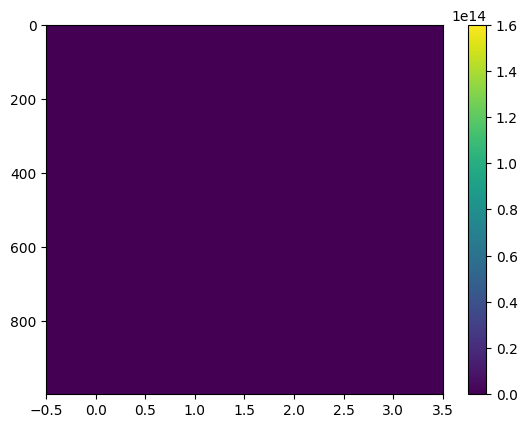

In [13]:
import matplotlib.pyplot as plt
imgplot=plt.imshow(Qimplicita,aspect='auto')
plt.colorbar()